**6장 – 결정 트리**

_이 노트북은 6장에 있는 모든 샘플 코드와 연습문제 해답을 가지고 있습니다._

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/handson-ml2/blob/master/06_decision_trees.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

# 설정

먼저 몇 개의 모듈을 임포트합니다. 맷플롯립 그래프를 인라인으로 출력하도록 만들고 그림을 저장하는 함수를 준비합니다. 또한 파이썬 버전이 3.5 이상인지 확인합니다(파이썬 2.x에서도 동작하지만 곧 지원이 중단되므로 파이썬 3을 사용하는 것이 좋습니다). 사이킷런 버전이 0.20 이상인지도 확인합니다.

In [3]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 결정 트리 학습과 시각화

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이(petal length)와 너비(petal width)
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

**<그림 6-1. 붓꽃 결정 트리> 생성 코드**

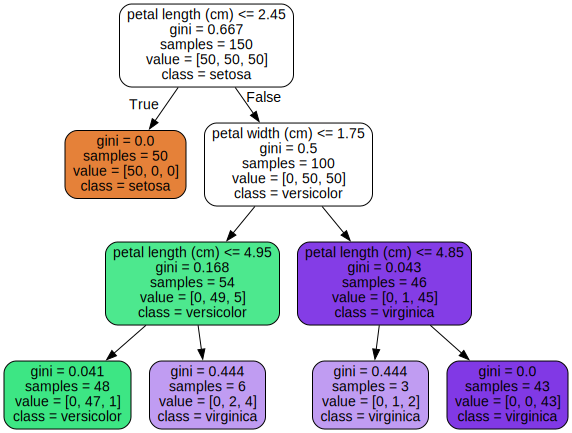

In [8]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,    # node 박스안 분류 표기 이름   
        rounded=True,                     # leaf node 박스 모서리 라운드 
        filled=True                       # ndoe 박스안 색상 사용 여부 
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

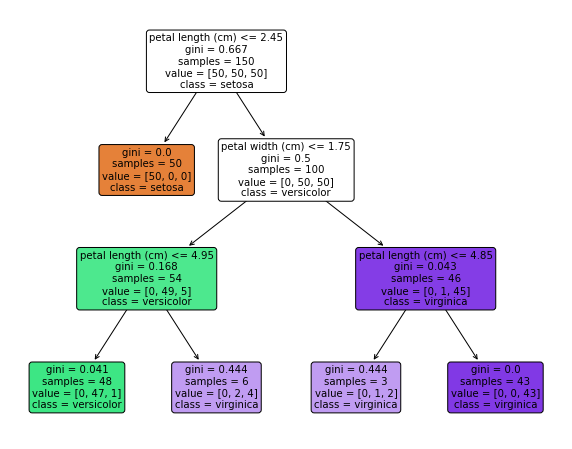

In [9]:
# plot_tree 로 그리는 방법
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8))
plot_tree(tree_clf,
          filled = True,
          rounded = True,
          feature_names = iris.feature_names[2:],
          class_names = iris.target_names)
plt.show()

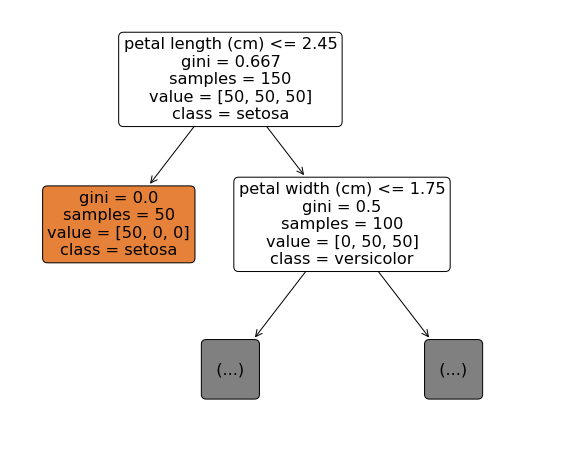

In [6]:
# plot_tree 일부만 나타낼수 있음: max_depth 매개변수 
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8))
plot_tree(tree_clf,
          filled = True,
          rounded = True,
          feature_names = iris.feature_names[2:],
          class_names = iris.target_names,
          max_depth = 1)
plt.show()

# 예측하기

**식 6-1: 지니 불순도**

$
G_i = 1 - \sum\limits_{k=1}^{n}{{p_{i,k}}^2}
$

**식 6-3: 엔트로피 불순도**

$
H_i = -\sum\limits_{k=1 \atop p_{i,k} \ne 0}^{n}{{p_{i,k}}\log_2(p_{i,k})}
$


**식 6-2: 분류에 대한 CART 비용 함수**

$
\begin{split}
&J(k, t_k) = \dfrac{m_{\text{left}}}{m}G_\text{left} + \dfrac{m_{\text{right}}}{m}G_{\text{right}}\\
&\text{여기에서 }\begin{cases}
G_\text{left/right} \text{는 왼쪽/오른쪽 서브셋의 불순도}\\
m_\text{left/right} \text{는 왼쪽/오른쪽 서브셋의 샘플 수}
\end{cases}
\end{split}
$

**<그림 6-2. 결정 트리의 결정 경계> 생성 코드**

ListedColormap: <https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html>

contour: <https://m31phy.tistory.com/220> \\
 <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html>

그림 저장: decision_tree_decision_boundaries_plot


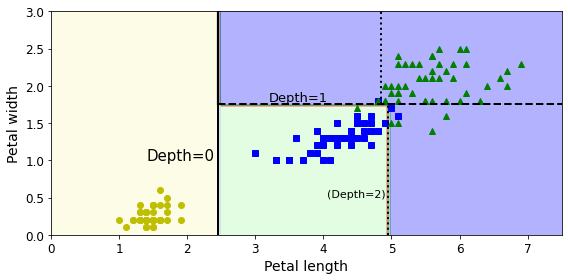

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris= True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)      #  0 <= X <= 7.5 범위에서 포인트 100개 추출
    x2s = np.linspace(axes[2], axes[3], 100)      #  0 <= Y <= 3.0 범위에서 포인트 100개 추출
    x1, x2 = np.meshgrid(x1s, x2s)                #  격자 생성 
    X_new = np.c_[x1.ravel(), x2.ravel()]         # 100 x 100 좌표
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0','red', 'green', 'blue'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

# if plot_training, if iris 만 사용됨
    if not iris:    # 왜 사용하는 걸까?
       custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50', 'red', 'green', 'blue'])
       # custom_cmap2 = ListedColormap(['red','green','blue']) 
       plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:       
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
# 위 tree_plot 분류 조건: 1.petal length = 2.45, 2.petal width = 1.75
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)           # 이 값을 확인해서 자동으로 생성하는 방법은?
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)     # 상동
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)        # 상동 max_depth = 3을 설정해야 petal length = 4.95, 4.85 구할수 있음
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)        # 상동
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# 클래스 확률 추정

In [10]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [11]:
tree_clf.predict([[5, 1.5]])

array([2])

# 규제 매개변수

(회전 같은) 데이터셋의 작은 변화가 매우 다른 결정 트리를 만들었습니다.
사이킷런에서 사용하는 CART 훈련 알고리즘은 확률적이기 때문에 동일한 데이터에서 같은 모델을 훈련하여 매번 매우 다른 모델을 만들 수 있습니다. 이를 확인하기 위해 `random_state`를 다른 값으로 지정해 보겠습니다:

In [12]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)  # 확률에 따라 달라짐 
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

**<그림 6-8. 훈련 세트의 세부사항에 민감한 결정 트리> 생성 코드**

**_억지로 맞춘 것 확인해 볼 것_**

그림 저장: decision_tree_instability_plot


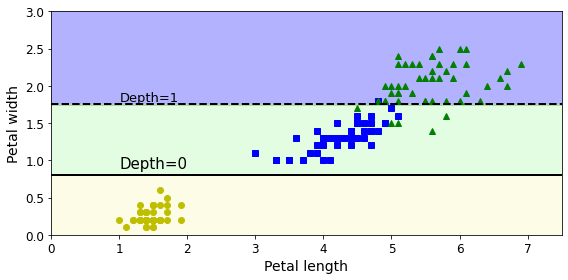

In [13]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

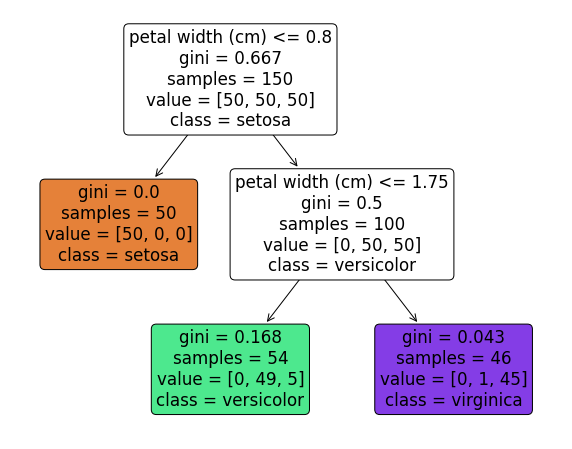

In [14]:
plt.figure(figsize=(10,8))
plot_tree(tree_clf_tweaked,
          filled = True,
          rounded = True,
          feature_names = iris.feature_names[2:],
          class_names = iris.target_names)
plt.show()

In [15]:
 X[(X[:,1] == X[:,1][y==1].max()) & (y==1)]

array([[4.8, 1.8]])

In [16]:
not_widest_versicolor = (X[:,1]!=1.8) | (y==2)
X_tweaked2 = X[not_widest_versicolor]
y_tweaked2 = y[not_widest_versicolor]

# random_state에 달라지고 위에서 구한 샘플을 제거한 것과는 차이가 없음, 유투브 설명 확인 요(25분 위치) 
tree_clf_tweaked2 = DecisionTreeClassifier(max_depth=2, random_state=42)  
tree_clf_tweaked2.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

그림 저장: decision_tree_instability_plot


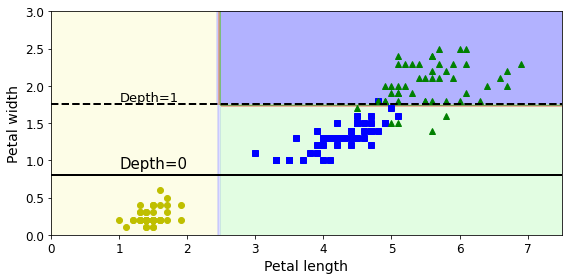

In [17]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked2, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

**<그림 6-3. min_samples_leaf 매개변수를 사용한 규제> 생성 코드**

실제 규제가 되는지 확인해 볼 것

그림 저장: min_samples_leaf_plot


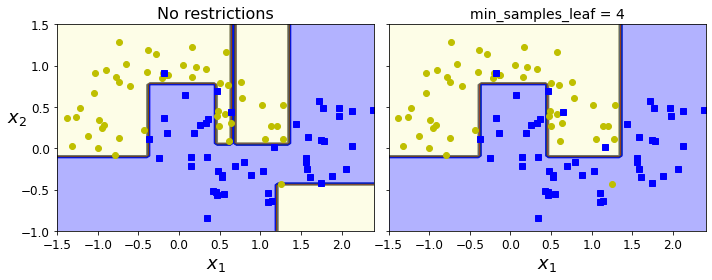

In [29]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()      

위 그림으로 보는 게 맞는가? 결정 라인은 어떻게 만들었는지?
tree_plot 생성해 봄 

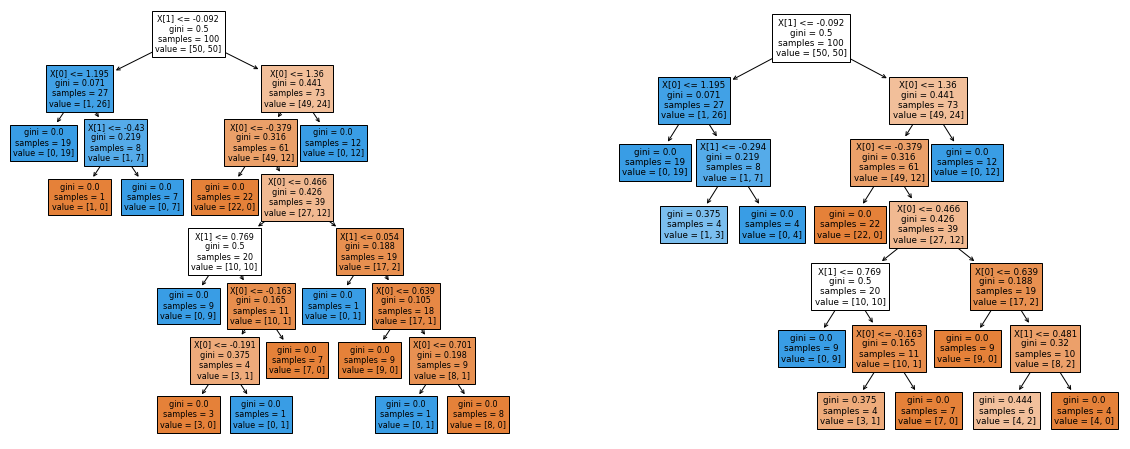

In [30]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 8))

plt.sca(axes[0])
plot_tree(deep_tree_clf1,
          filled = True)

plt.sca(axes[1])
plot_tree(deep_tree_clf2,
          filled = True)

plt.show()

데이터셋을 회전하면 완전히 다른 결정 경계를 만듭니다:

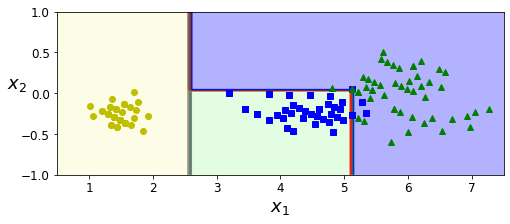

In [20]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

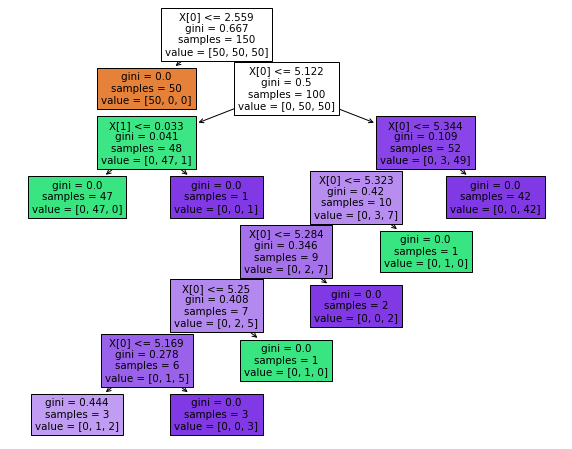

In [21]:
plt.figure(figsize=(10,8))
plot_tree(tree_clf_r,
          filled = True)
plt.show()

**<그림 6-7. 훈련 세트의 회전에 민감한 결정 트리> 생성 코드**

그림 저장: sensitivity_to_rotation_plot


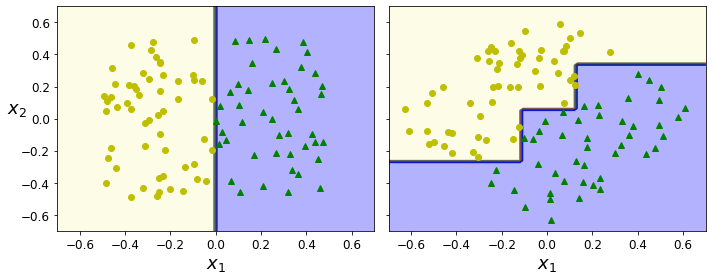

In [22]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

# 회귀

간단한 선형 데이터셋을 준비합니다:

In [23]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

**코드 예제:**

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

**<그림 6-5. 두 개의 결정 트리 회귀 모델의 예측> 생성 코드**

그림 저장: tree_regression_plot


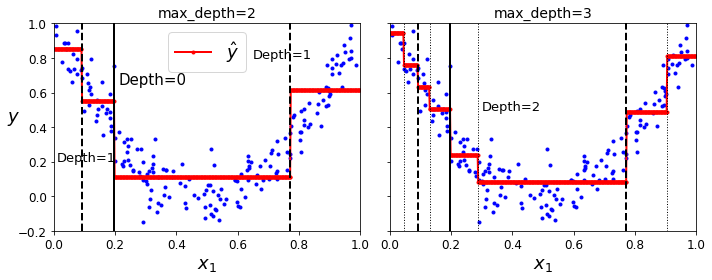

In [25]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

**<그림 6-4. 회귀 결정 트리> 생성 코드**

In [26]:
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

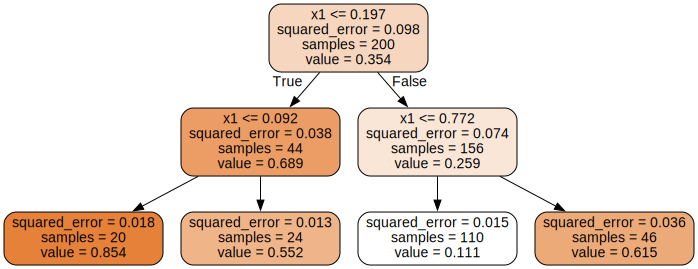

In [27]:
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

**<그림 6-6. 결정 트리 회귀 모델의 규제> 생성 코드**

그림 저장: tree_regression_regularization_plot


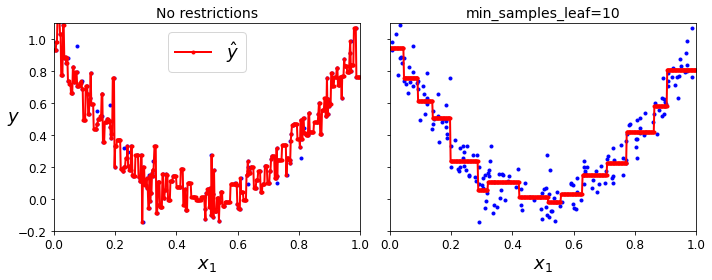

In [28]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

# 연습문제 해답

## 1. to 6.

부록 A 참조.

## 7.

_문제: moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝해보세요._

a. `make_moons(n_samples=1000, noise=0.4)`를 사용해 데이터셋을 생성합니다.

`random_state=42`를 지정하여 결과를 일정하게 만듭니다:

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [10]:
X.shape, y.shape

((10000, 2), (10000,))

In [19]:
type(X), type(y), X[0:5,:], y[0:5]

(numpy.ndarray,
 numpy.ndarray,
 array([[ 0.9402914 ,  0.12230559],
        [ 0.12454026, -0.42477546],
        [ 0.26198823,  0.50841438],
        [-0.49523824,  0.07258876],
        [-0.87941281,  0.54937303]]),
 array([1, 0, 0, 0, 0], dtype=int64))

b. 이를 `train_test_split()`을 사용해 훈련 세트와 테스트 세트로 나눕니다

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 2), (8000,), (2000, 2), (2000,))

c. `DecisionTreeClassifier`의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행합니다  
(`GridSearchCV`를 사용하면 됩니다). 힌트: 여러 가지 `max_leaf_nodes` 값을 시도해보세요.

- 규제매개변수: 트리의 자유도(성장)을 제한하는 매개 변수
    - **max_depth: 깊이 조정, 루트 노드 0, 디폴트 None**
    - **min_samples_split: 분할되기 위해 노드의 최소 샘플수, 설정값 이하이면 분할 중단** 
    - **min_samples_leaf: leaf 노드가 가져야할 최소 샘플**    
    - min_weight_fraction_leaf: min_samples_leaf와 동일하나 전체 샘플에서 비율
    - **max_leaf_nodes: leaf 노드의 최대수**
    - max_features: 분할에 사용되는 특성의 최대수
    

In [31]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [32]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

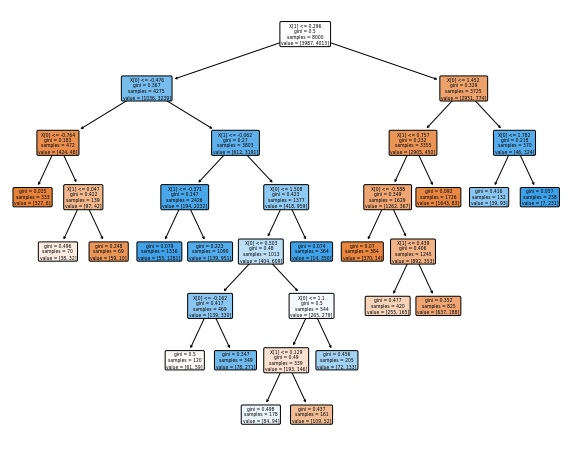

In [33]:
# plot tree
from sklearn.tree import plot_tree

make_moon_clf = DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)
make_moon_clf.fit(X_train, y_train)

plt.figure(figsize=(10,8))
plot_tree(make_moon_clf,
          filled = True,
          rounded = True)
plt.show()

d. 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델을 훈련시키고 테스트 세트에서 성능을 측정합니다. 대략 85~87%의 정확도가 나올 것입니다.

기본적으로 `GridSearchCV`는 전체 훈련 세트로 찾은 최적의 모델을 다시 훈련시킵니다(`refit=False`로 지정해서 바꿀 수 있습니다). 그래서 별도로 작업할 필요가 없습니다. 모델의 정확도를 바로 평가할 수 있습니다:

In [34]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

In [24]:
#2. GridSearchCV에 max_depth 추가 ==> 결론적으로 좀 더 단순한 모델로 유사한 정확율 도출 가능

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'max_depth':[2,3,4,5]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 1176 candidates, totalling 3528 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [25]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, random_state=42)

In [26]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.863

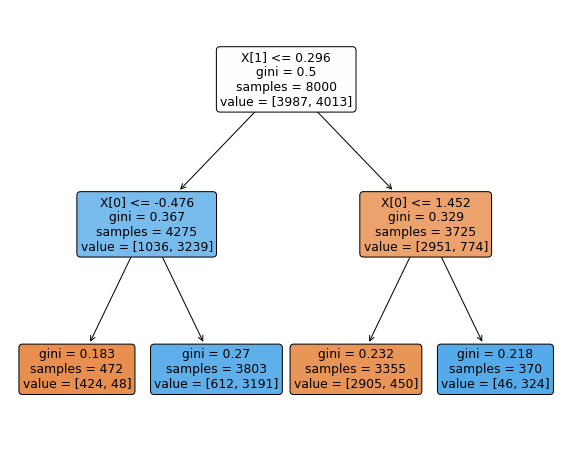

In [30]:
from sklearn.tree import plot_tree

make_moon_clf = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, random_state=42)
make_moon_clf.fit(X_train, y_train)

plt.figure(figsize=(10,8))
plot_tree(make_moon_clf,
          filled = True,
          rounded = True)
plt.show()

In [35]:
# 3. GridSearchCV에 max_depth만 사용하는 경우 (위 2와 동일함)

from sklearn.model_selection import GridSearchCV

params = {'max_depth': list(range(2, 10))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}, verbose=1)

In [36]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=42)

In [37]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.863

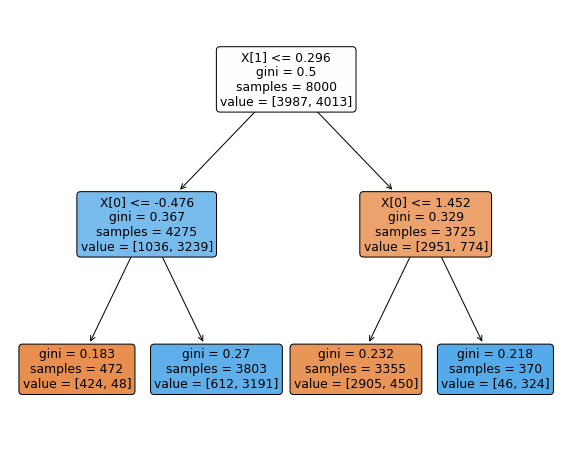

In [40]:
from sklearn.tree import plot_tree

make_moon_clf3 = DecisionTreeClassifier(max_depth=2, random_state=42)
make_moon_clf3.fit(X_train, y_train)

plt.figure(figsize=(10,8))
plot_tree(make_moon_clf3,
          filled = True,
          rounded = True)
plt.show()

In [41]:
make_moon_clf3.cost_complexity_pruning_path(X_train, y_train)

{'ccp_alphas': array([0.        , 0.04581271, 0.05707611, 0.15046701]),
 'impurities': array([0.2466389 , 0.2924516 , 0.34952771, 0.49999472])}

Minimal Cost-Complexity Pruning:  <https://scikit-learn.org/stable/modules/tree.html#bre>
과적합 방지: https://runebook.dev/ko/docs/scikit_learn/auto_examples/tree/plot_cost_complexity_pruning

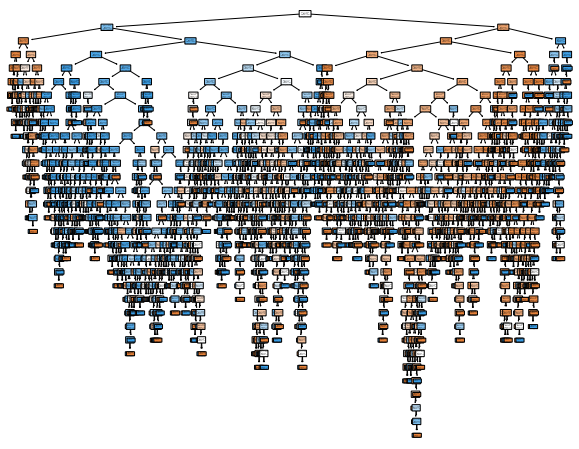

In [47]:
# 최대적합
from sklearn.tree import plot_tree

make_moon_clf_inf = DecisionTreeClassifier(random_state=42)
make_moon_clf_inf.fit(X_train, y_train)

plt.figure(figsize=(10,8))
plot_tree(make_moon_clf_inf,
          filled = True,
          rounded = True)
plt.show()

In [50]:
tree_path = make_moon_clf_inf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = tree_path.ccp_alphas, tree_path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

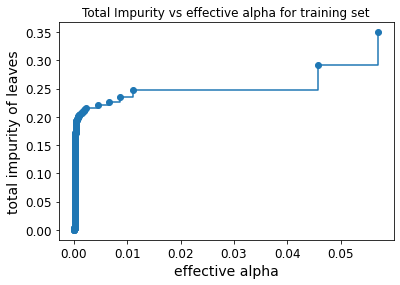

In [51]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [52]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1504670096562365


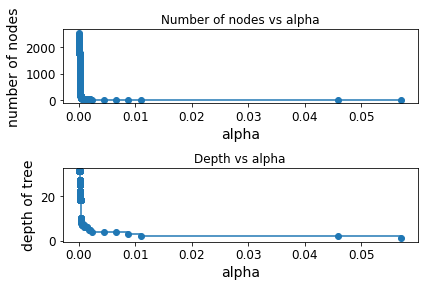

In [53]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

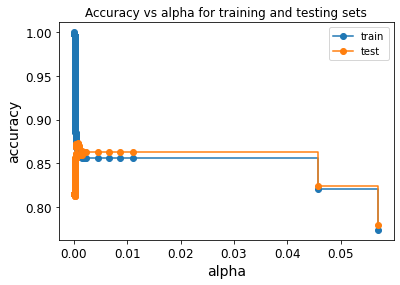

In [56]:
train_scores = [make_moon_clf_inf.score(X_train, y_train) for make_moon_clf_inf in clfs]
test_scores = [make_moon_clf_inf.score(X_test, y_test) for make_moon_clf_inf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

## 8.

_문제: 랜덤 포레스트를 만들어보세요._

a. 이전 연습문제에 이어서, 훈련 세트의 서브셋을 1,000개 생성합니다. 각각은 무작위로 선택된 100개의 샘플을 담고 있습니다. 힌트: 사이킷런의 `ShuffleSplit`을 사용할 수 있습니다.

In [ ]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. 앞에서 찾은 최적의 매개변수를 사용해 각 서브셋에 결정 트리를 훈련시킵니다. 테스트 세트로 이 1,000개의 결정 트리를 평가합니다. 더 작은 데이터셋에서 훈련되었기 때문에 이 결정 트리는 앞서 만든 결정 트리보다 성능이 떨어져 약 80%의 정확도를 냅니다.

In [ ]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

c. 이제 마술을 부릴 차례입니다. 각 테스트 세트 샘플에 대해 1,000개의 결정 트리 예측을 만들고 다수로 나온 예측만 취합니다(사이파이의 `mode()` 함수를 사용할 수 있습니다). 그러면 테스트 세트에 대한 _다수결 예측_이 만들어집니다.

In [ ]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [ ]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

d. 테스트 세트에서 이 예측을 평가합니다. 앞서 만든 모델보다 조금 높은(약 0.5~1.5% 정도) 정확도를 얻게 될 것입니다. 축하합니다. 랜덤 포레스트 분류기를 훈련시켰습니다!

In [ ]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))